In [66]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd=r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

### TRY 1

Summary-----------<br>
Not working!<br>
Randomly changing colors mostly not usefull<br>
<br>
Learned------------<br>
matplotlib library used for showing image. (plt.imshow(x))<br>
cv2.imshow("x",x) not working on jupyter right now but its working on pycharm tried.<br>
cv2.cvtColor(x,cv2.COLOR_xxxx) used!<br>
<br>
Still Not Knowen---<br>
cv2.GaussianBlur(x, ...) used but not researched yet.<br>
cv2.threshold(x, ...) used but not researched yet.<br>
cv2.getStructuringElement() used but not researched yet.<br>
cv2.morphologyEx() used but not resarched yet.<br>

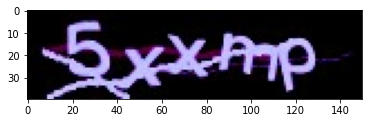

In [2]:
image = cv2.imread('captcha.jpg')
plt.imshow(image)
text = pytesseract.image_to_string(image)
print(text)

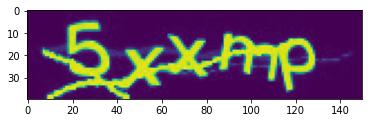

In [3]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
text = pytesseract.image_to_string(gray)
print(text)

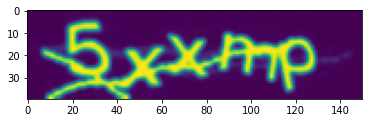

In [4]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
plt.imshow(blur)
text = pytesseract.image_to_string(blur)
print(text)

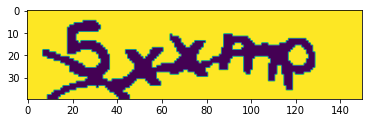

In [5]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(thresh)
text = pytesseract.image_to_string(thresh)
print(text)

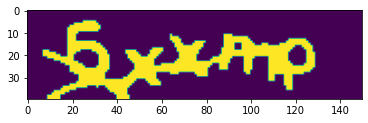

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening
plt.imshow(invert)
text = pytesseract.image_to_string(invert)
print(text)

In [7]:
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
print(data)

~8oem0



### TRY 2

Summary-----------<br>
Not Working!<br>
Now image has better colors but its still working wrong. Its seem 1 as a I.<br>

Learned------------<br>
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) imread's default colors not working normal u should use cvtColor with COLOR_BGR2RGB and this changing 
    images color to RGB.<br>
    
Still Not Knowen---<br>
cv2.resize still unknowen its all the time looks same in jupyter. (i will try it on pycharm)<br>
cv2.morphologyEx() ... not knowen yet firstly wanna learn resize.<br>
cv2.threshold() ... same with morphologyEx().<br>

IMQW



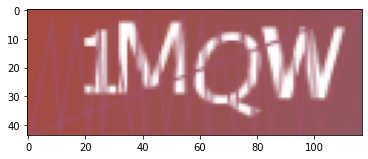

In [14]:
image = cv2.imread('captcha1.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
text = pytesseract.image_to_string(image)
print(text)

IMQW



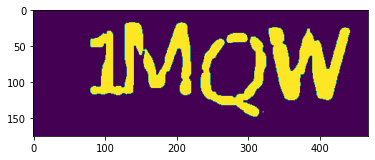

In [37]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
(h, w) = gray.shape[:2]
gray = cv2.resize(gray,(w*2,h*2))
cls = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, None)
thr = cv2.threshold(cls, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
text = pytesseract.image_to_string(thr)
print(text)
plt.imshow(thr)

### TRY 3

Summary-----------<br>
Working!<br>
All noise cleared.<br>
<br>
Learned------------<br>
thresholding :<br>
Giriş olarak verilen görüntüyü ikili görüntüye çevirmek için kullanılan bir yöntemdir. İkili görüntü (binary), görüntünün siyah ve beyaz olarak tanımlanmasıdır. Morfolojik operatörler gibi görüntü üzerindeki gürültüleri azaltmak veya nesne belirlemek gibi farklı amaçlar için kullanılır. Giriş olarak verilen görüntü üzerinde uygulanan thresholding tipine bağlı olarak, pikselleri verilen eşik değerine göre siyah ya da beyaz olarak günceller.<br>
https://mesutpiskin.com/blog/opencv-thresholding-esikleme.html <br>
https://learnopencv.com/opencv-threshold-python-cpp/<br>
Bluring : <br>
https://abdulsamet-ileri.medium.com/g%C3%B6r%C3%BCnt%C3%BC-filtrelerini-uygulama-ve-kenarlar%C4%B1-alg%C4%B1lama-21d42f194db4 <br>



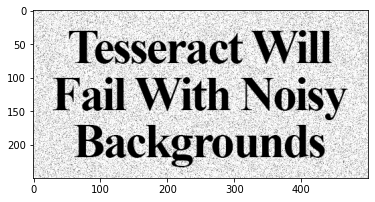

In [97]:
image = cv2.imread('example_02.png')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

#### Threshold Try -- Start

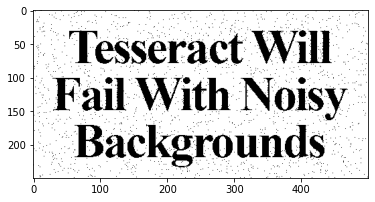

In [98]:
ret, thresh1 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1)

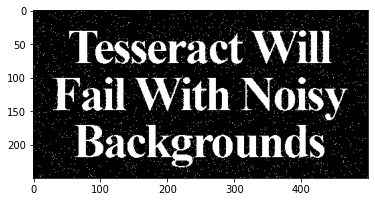

In [99]:
ret, thresh2 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh2)

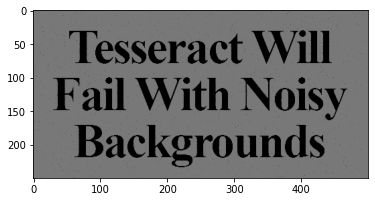

In [100]:
ret, thresh3 = cv2.threshold(image, 120, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh3)

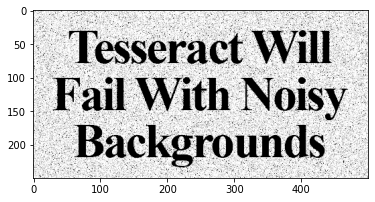

In [101]:
ret, thresh4 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh4)

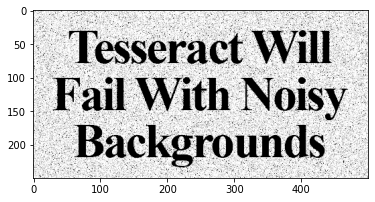

In [102]:
ret, thresh5 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh5)

#### Threshold Try -- End

_ Tesseract Will
Fail With Noisy
_ Backgrounds —



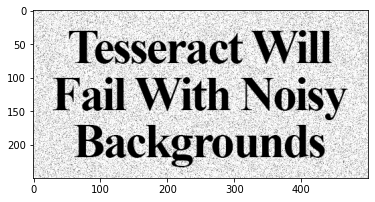

In [103]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))
text = pytesseract.image_to_string(gray)
print(text)

~ Tesseract Will
Fail With Noisy
- Backgrounds —



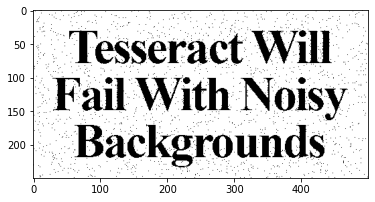

In [104]:
##ret, gray = cv2.threshold(gray,0,255,cv2.THRESH_TOZERO)
gray = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
text = pytesseract.image_to_string(gray)
print(text)

Tesseract Will
Fail With Noisy
Backgrounds



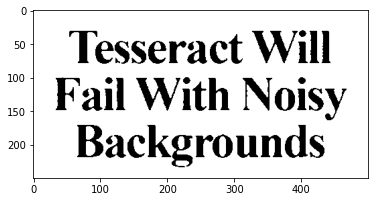

In [105]:
gray = cv2.medianBlur(gray, 3)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
text = pytesseract.image_to_string(gray)
print(text)